In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("sales_train.csv")
cat=pd.read_csv("item_categories.csv")
items=pd.read_csv("items.csv")

In [3]:
y=pd.merge(train,items,on='item_id',how='left')


In [4]:
grouped=pd.DataFrame(y.groupby(['item_category_id'])['item_cnt_day'].sum().reset_index())

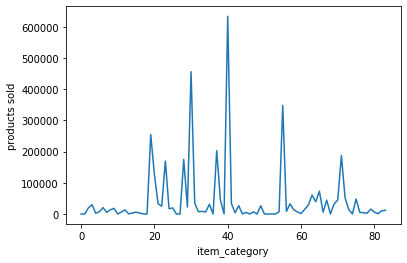

In [5]:
plt.xlabel("item_category")
plt.ylabel("products sold")
plt.plot(grouped.item_category_id,grouped.item_cnt_day)
plt.show()

In [6]:
y

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57


In [7]:
y['date']= pd.to_datetime(y['date'])

In [8]:
grouped

,item_category_id,item_cnt_day
0,0,3.0
1,1,2.0
2,2,19597.0
3,3,29807.0
4,4,2407.0
...,...,...
79,79,15830.0
80,80,6136.0
81,81,965.0
82,82,10437.0


In [17]:
a=grouped.head(10)
b=grouped.tail(42)
#m=grouped[10]
grouped.sum()

item_category_id       3486.0
item_cnt_day        3648206.0
dtype: float64

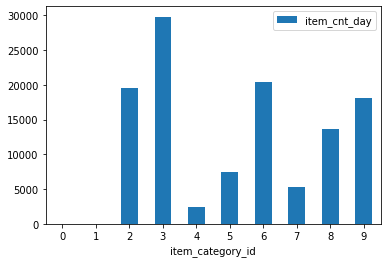

In [10]:
ax=a.plot.bar(x="item_category_id",y="item_cnt_day",rot=0)

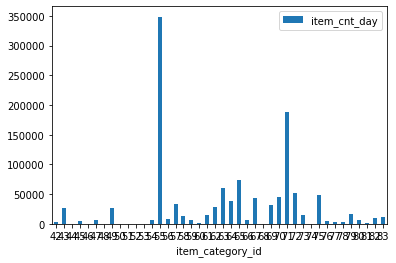

In [11]:
ax=b.plot.bar(x="item_category_id",y="item_cnt_day",rot=0)

In [54]:
ts=y.pivot_table(index='date_block_num',columns='item_category_id',values='item_cnt_day',aggfunc=sum)
ts

item_category_id,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
date_block_num,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1390.0,440.0,251.0,623.0,870.0,NaN,NaN,149.0,...,NaN,2980.0,NaN,481.0,NaN,145.0,NaN,177.0,1374.0,894.0
1,1.0,1.0,1190.0,302.0,220.0,358.0,668.0,NaN,NaN,159.0,...,NaN,2670.0,NaN,519.0,NaN,128.0,NaN,111.0,1192.0,574.0
2,NaN,NaN,1025.0,293.0,226.0,354.0,646.0,NaN,NaN,211.0,...,NaN,2523.0,NaN,431.0,NaN,275.0,NaN,106.0,1125.0,675.0
3,1.0,NaN,646.0,202.0,160.0,275.0,465.0,NaN,NaN,138.0,...,NaN,1998.0,NaN,394.0,NaN,94.0,NaN,115.0,1021.0,523.0
4,NaN,NaN,596.0,146.0,175.0,281.0,441.0,NaN,NaN,95.0,...,NaN,1568.0,95.0,272.0,37.0,83.0,NaN,113.0,1139.0,527.0
5,NaN,NaN,667.0,150.0,176.0,329.0,502.0,NaN,NaN,124.0,...,NaN,1442.0,98.0,256.0,82.0,64.0,NaN,75.0,1114.0,761.0
6,NaN,NaN,618.0,233.0,179.0,355.0,622.0,NaN,NaN,83.0,...,NaN,1519.0,100.0,291.0,55.0,64.0,NaN,98.0,889.0,676.0
7,NaN,NaN,674.0,300.0,140.0,299.0,637.0,NaN,NaN,124.0,...,NaN,1639.0,105.0,233.0,36.0,67.0,NaN,48.0,657.0,444.0
8,NaN,NaN,792.0,383.0,86.0,289.0,729.0,NaN,NaN,141.0,...,NaN,1846.0,121.0,131.0,149.0,52.0,NaN,32.0,506.0,278.0


In [13]:
abc=y.pivot_table(index='shop_id',columns='item_category_id',values='item_cnt_day',aggfunc=sum)
abc

item_category_id,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
shop_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,105.0,52.0,38.0,63.0,144.0,NaN,NaN,NaN,...,NaN,338.0,NaN,120.0,NaN,NaN,NaN,44.0,146.0,86.0
1,NaN,NaN,63.0,18.0,30.0,25.0,66.0,NaN,NaN,NaN,...,NaN,132.0,NaN,68.0,NaN,NaN,NaN,28.0,169.0,64.0
2,NaN,NaN,355.0,527.0,42.0,50.0,329.0,76.0,4.0,NaN,...,NaN,512.0,NaN,36.0,NaN,222.0,NaN,2.0,70.0,51.0
3,NaN,NaN,200.0,360.0,28.0,107.0,254.0,63.0,100.0,NaN,...,NaN,156.0,NaN,13.0,NaN,252.0,99.0,NaN,NaN,56.0
4,NaN,NaN,309.0,333.0,101.0,156.0,337.0,46.0,6.0,NaN,...,NaN,781.0,NaN,106.0,NaN,501.0,5.0,31.0,380.0,70.0
5,NaN,NaN,232.0,340.0,38.0,95.0,211.0,68.0,39.0,NaN,...,NaN,123.0,NaN,12.0,NaN,309.0,26.0,NaN,NaN,120.0
6,NaN,NaN,422.0,755.0,21.0,173.0,371.0,113.0,56.0,NaN,...,NaN,1653.0,NaN,184.0,NaN,639.0,62.0,52.0,608.0,693.0
7,NaN,NaN,491.0,554.0,92.0,209.0,456.0,70.0,19.0,NaN,...,NaN,936.0,NaN,18.0,NaN,689.0,25.0,NaN,NaN,145.0
8,NaN,NaN,19.0,NaN,2.0,7.0,12.0,NaN,NaN,NaN,...,NaN,39.0,NaN,21.0,NaN,1.0,NaN,NaN,NaN,NaN


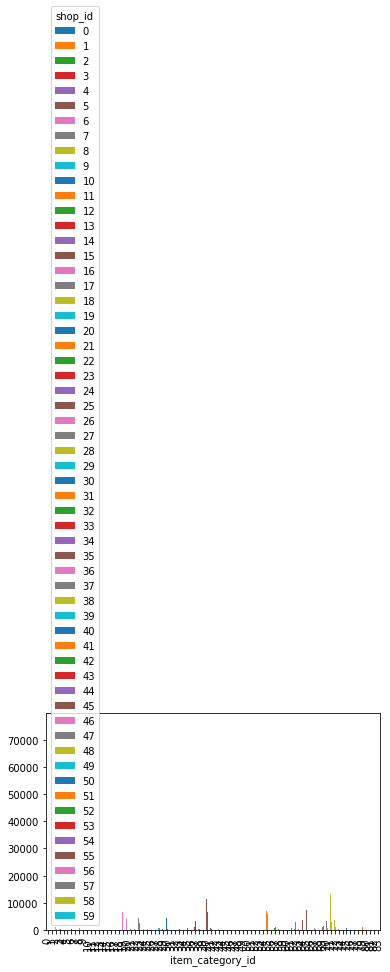

In [62]:
abc.T.plot(kind='bar')

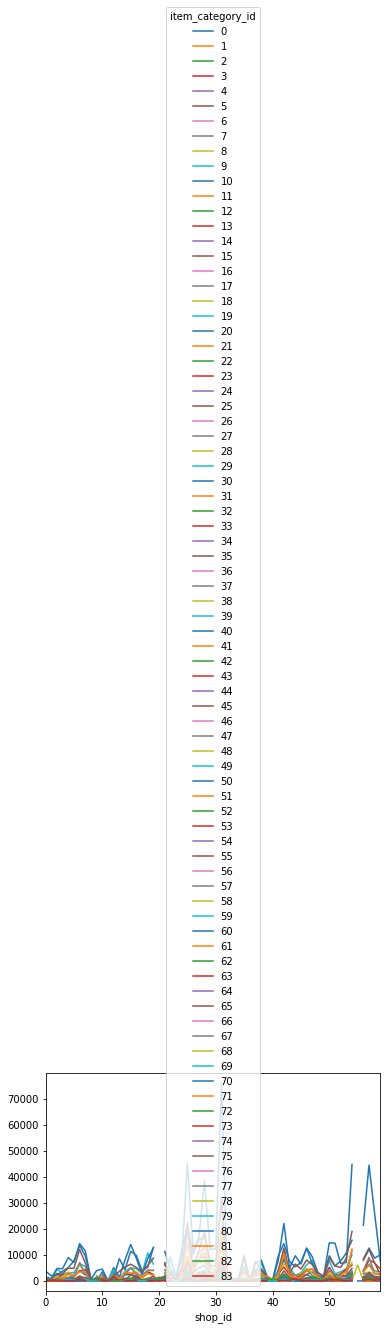

In [49]:
abc.plot()

In [18]:
y["item_cnt_day"].sum()

3648206.0

In [19]:
y.max()

date                          2015-12-10 00:00:00
date_block_num                                 33
shop_id                                        59
item_id                                     22169
item_price                                 307980
item_cnt_day                                 2169
item_name           Яйцо дракона (Игра престолов)
item_category_id                               83
dtype: object

In [20]:
grouped2=pd.DataFrame(y.groupby(['shop_id'])['item_cnt_day'].sum().reset_index())

In [21]:
grouped2

,shop_id,item_cnt_day
0,0,11705.0
1,1,6311.0
2,2,30620.0
3,3,28355.0
4,4,43942.0
5,5,42762.0
6,6,100489.0
7,7,67058.0
8,8,3595.0
9,9,15866.0


In [22]:
grouped

,item_category_id,item_cnt_day
0,0,3.0
1,1,2.0
2,2,19597.0
3,3,29807.0
4,4,2407.0
...,...,...
79,79,15830.0
80,80,6136.0
81,81,965.0
82,82,10437.0


In [91]:
abc


item_category_id,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
shop_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,105.0,52.0,38.0,63.0,144.0,NaN,NaN,NaN,...,NaN,338.0,NaN,120.0,NaN,NaN,NaN,44.0,146.0,86.0
1,NaN,NaN,63.0,18.0,30.0,25.0,66.0,NaN,NaN,NaN,...,NaN,132.0,NaN,68.0,NaN,NaN,NaN,28.0,169.0,64.0
2,NaN,NaN,355.0,527.0,42.0,50.0,329.0,76.0,4.0,NaN,...,NaN,512.0,NaN,36.0,NaN,222.0,NaN,2.0,70.0,51.0
3,NaN,NaN,200.0,360.0,28.0,107.0,254.0,63.0,100.0,NaN,...,NaN,156.0,NaN,13.0,NaN,252.0,99.0,NaN,NaN,56.0
4,NaN,NaN,309.0,333.0,101.0,156.0,337.0,46.0,6.0,NaN,...,NaN,781.0,NaN,106.0,NaN,501.0,5.0,31.0,380.0,70.0
5,NaN,NaN,232.0,340.0,38.0,95.0,211.0,68.0,39.0,NaN,...,NaN,123.0,NaN,12.0,NaN,309.0,26.0,NaN,NaN,120.0
6,NaN,NaN,422.0,755.0,21.0,173.0,371.0,113.0,56.0,NaN,...,NaN,1653.0,NaN,184.0,NaN,639.0,62.0,52.0,608.0,693.0
7,NaN,NaN,491.0,554.0,92.0,209.0,456.0,70.0,19.0,NaN,...,NaN,936.0,NaN,18.0,NaN,689.0,25.0,NaN,NaN,145.0
8,NaN,NaN,19.0,NaN,2.0,7.0,12.0,NaN,NaN,NaN,...,NaN,39.0,NaN,21.0,NaN,1.0,NaN,NaN,NaN,NaN


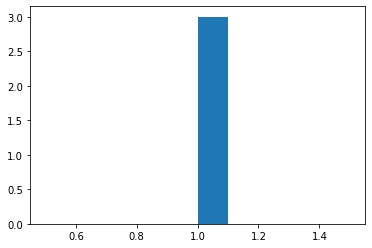

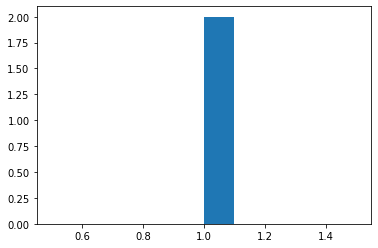

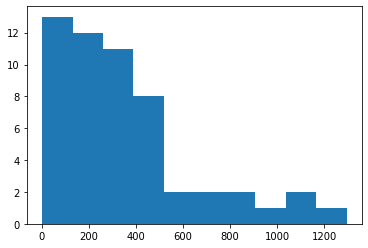

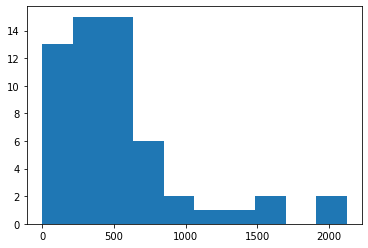

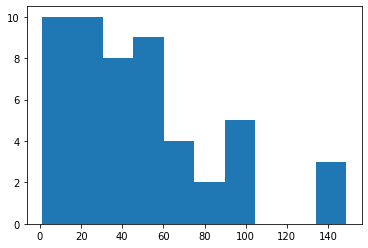

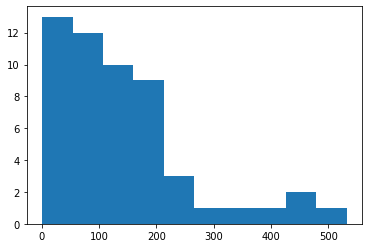

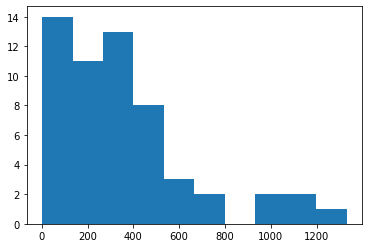

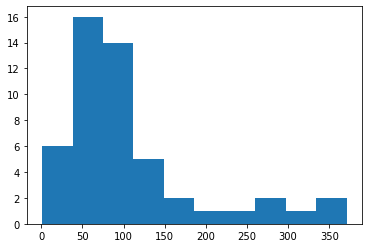

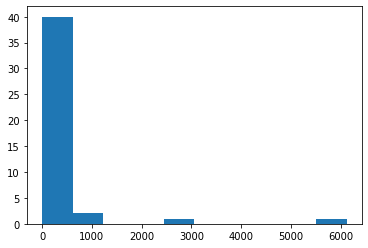

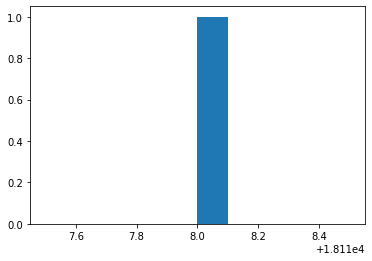

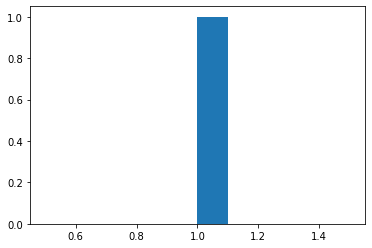

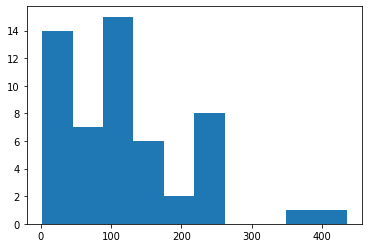

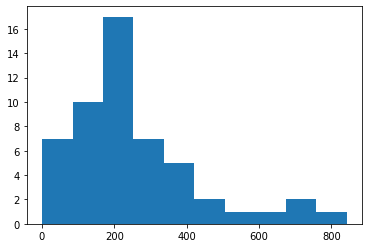

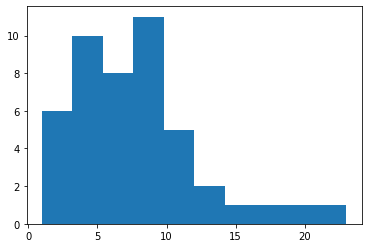

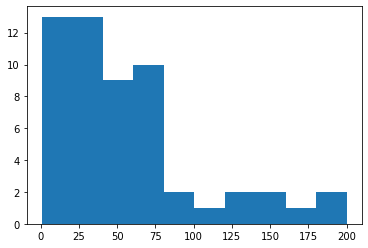

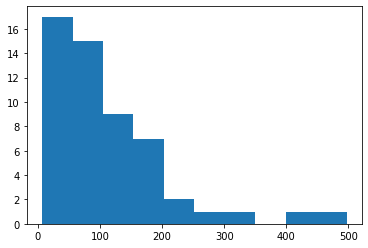

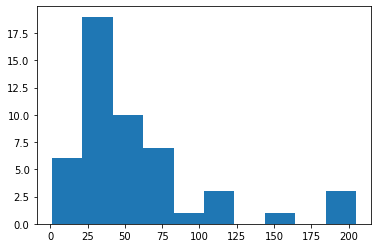

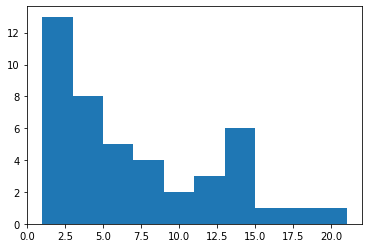

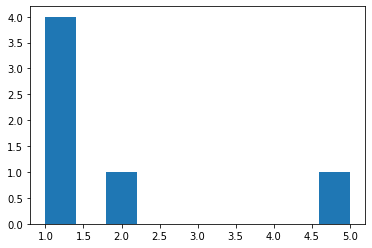

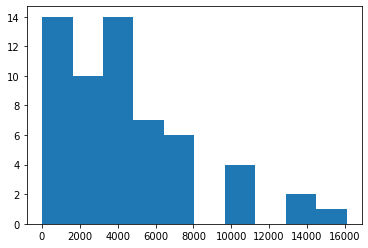

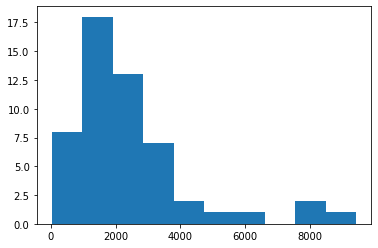

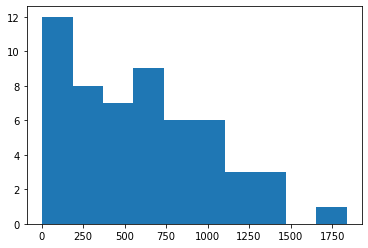

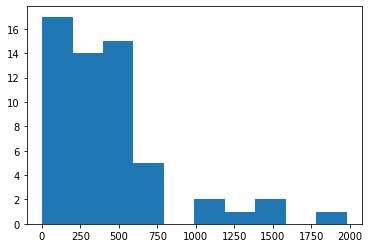

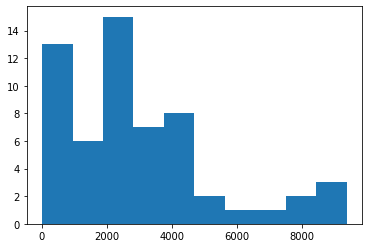

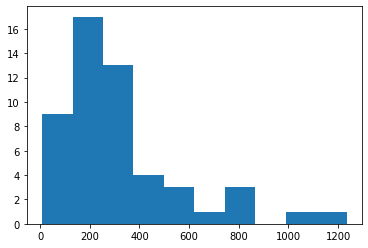

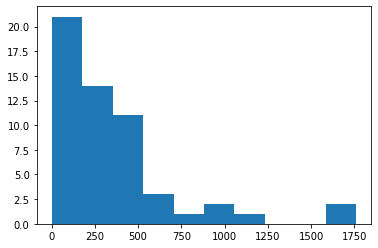

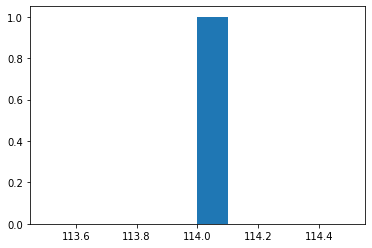

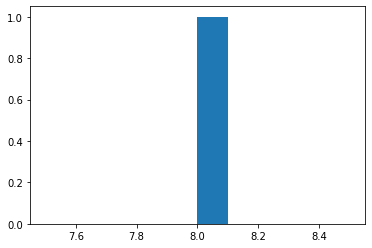

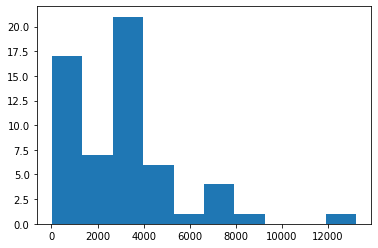

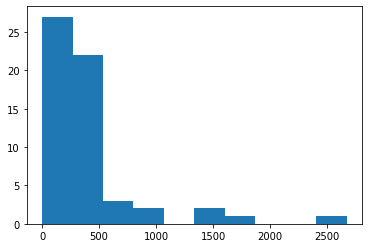

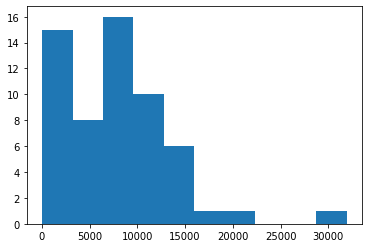

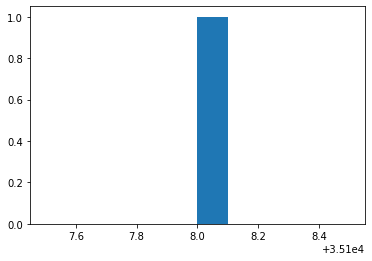

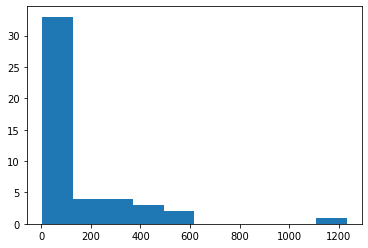

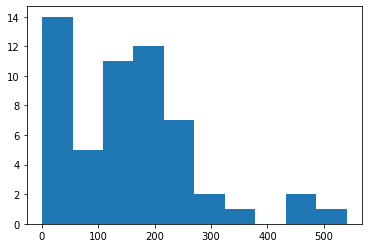

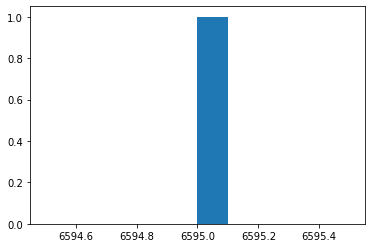

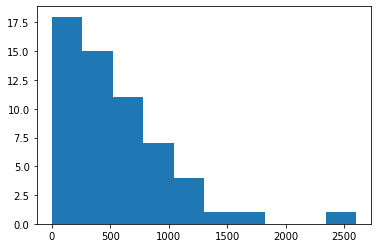

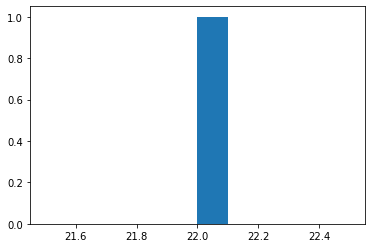

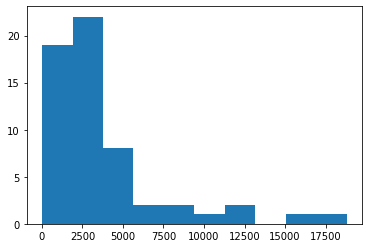

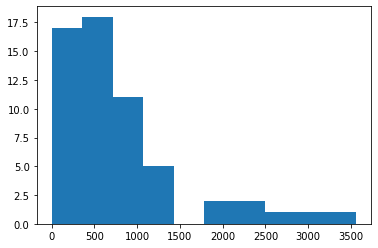

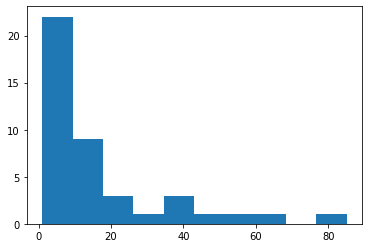

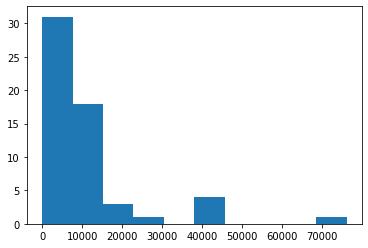

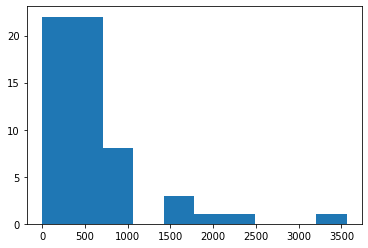

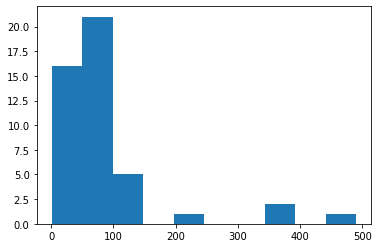

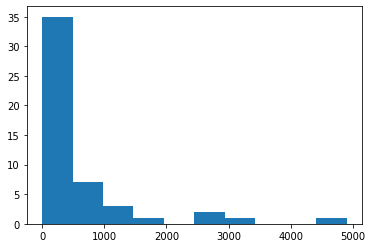

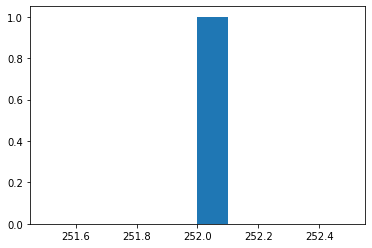

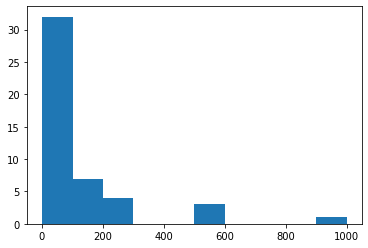

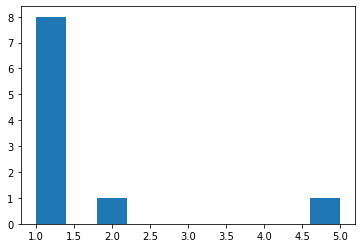

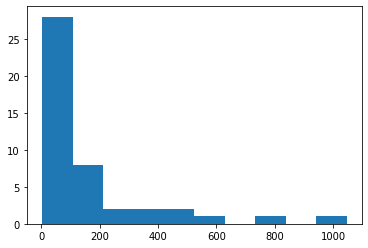

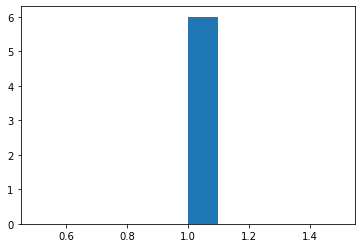

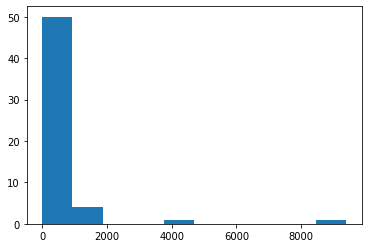

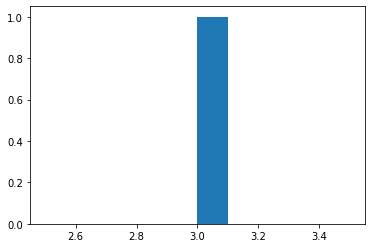

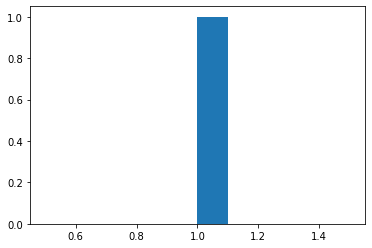

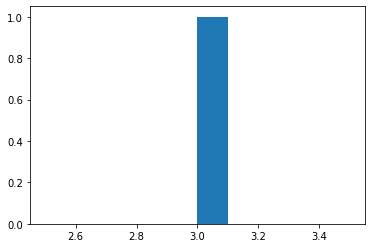

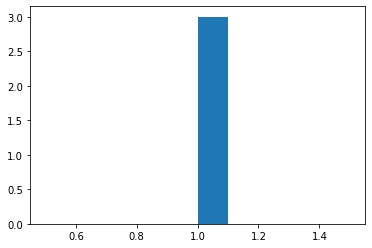

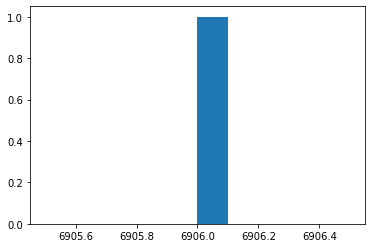

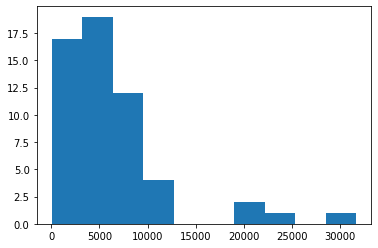

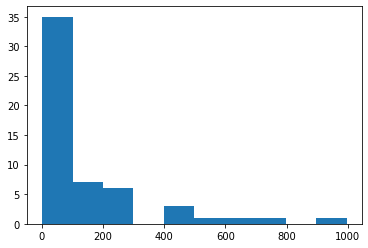

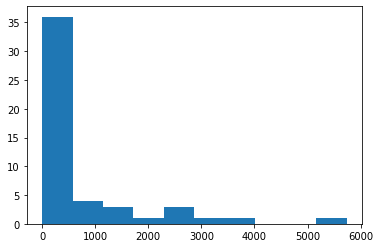

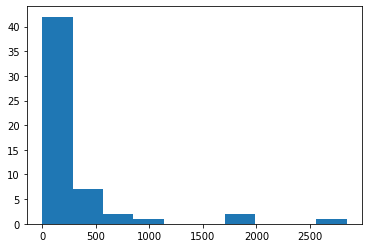

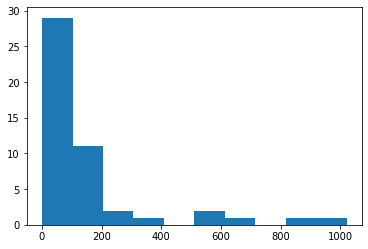

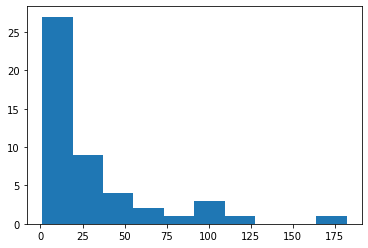

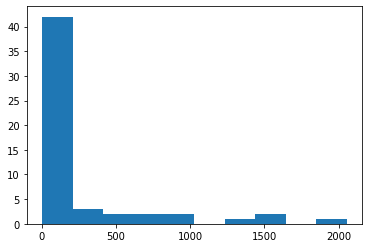

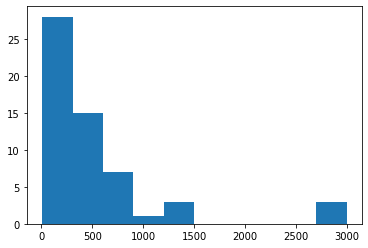

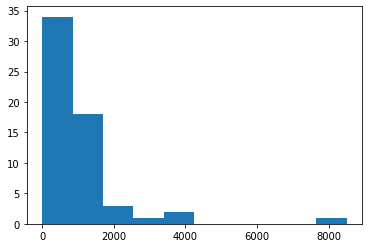

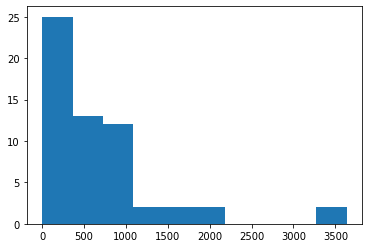

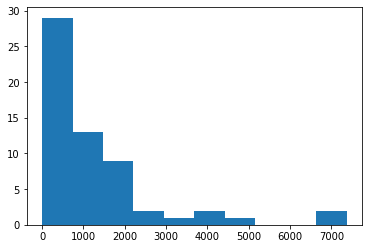

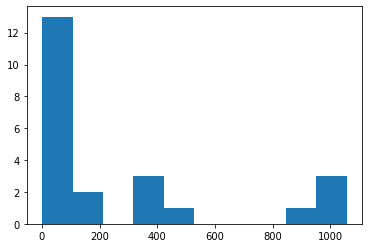

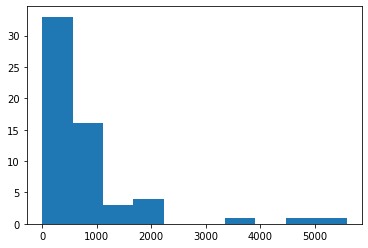

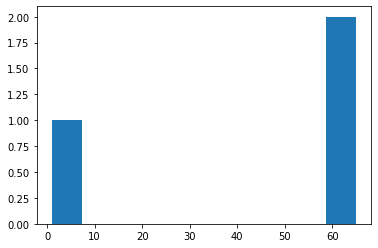

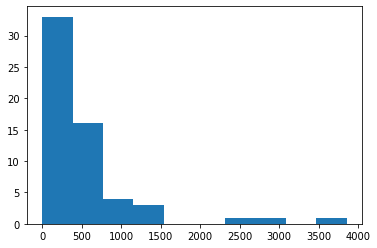

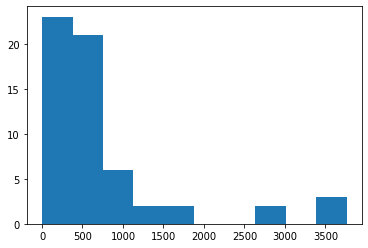

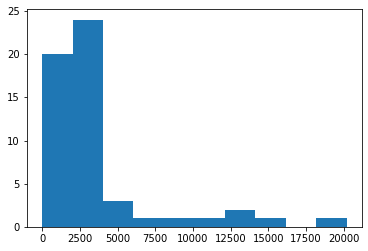

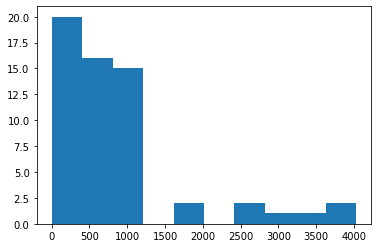

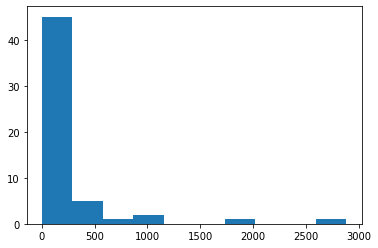

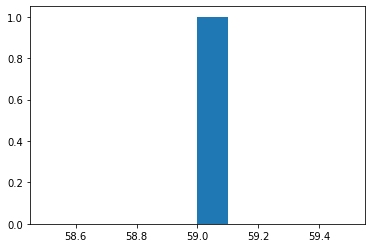

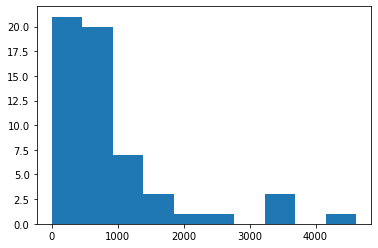

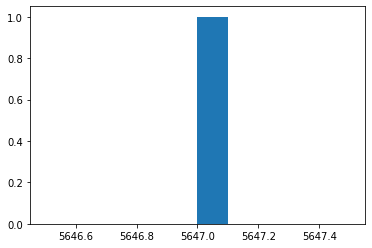

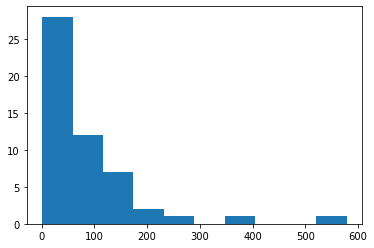

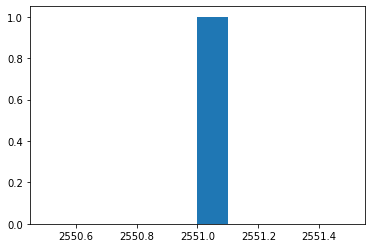

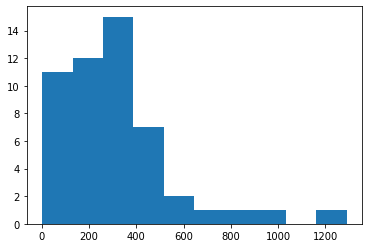

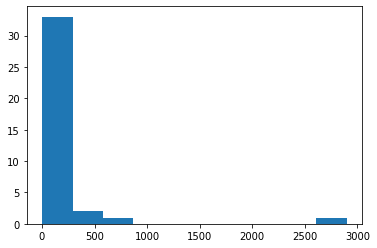

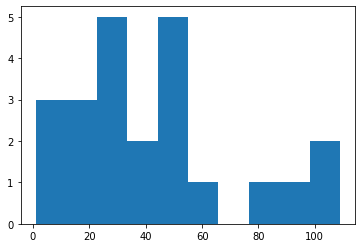

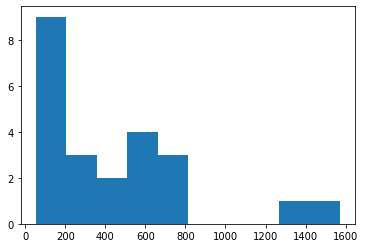

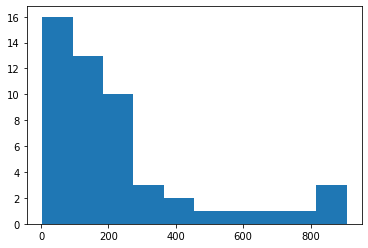

In [46]:
for i in range(84):
    plt.hist(abc[i],bins=10)
    plt.show()

In [41]:
abc

item_category_id,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
shop_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,105.0,52.0,38.0,63.0,144.0,NaN,NaN,NaN,...,NaN,338.0,NaN,120.0,NaN,NaN,NaN,44.0,146.0,86.0
1,NaN,NaN,63.0,18.0,30.0,25.0,66.0,NaN,NaN,NaN,...,NaN,132.0,NaN,68.0,NaN,NaN,NaN,28.0,169.0,64.0
2,NaN,NaN,355.0,527.0,42.0,50.0,329.0,76.0,4.0,NaN,...,NaN,512.0,NaN,36.0,NaN,222.0,NaN,2.0,70.0,51.0
3,NaN,NaN,200.0,360.0,28.0,107.0,254.0,63.0,100.0,NaN,...,NaN,156.0,NaN,13.0,NaN,252.0,99.0,NaN,NaN,56.0
4,NaN,NaN,309.0,333.0,101.0,156.0,337.0,46.0,6.0,NaN,...,NaN,781.0,NaN,106.0,NaN,501.0,5.0,31.0,380.0,70.0
5,NaN,NaN,232.0,340.0,38.0,95.0,211.0,68.0,39.0,NaN,...,NaN,123.0,NaN,12.0,NaN,309.0,26.0,NaN,NaN,120.0
6,NaN,NaN,422.0,755.0,21.0,173.0,371.0,113.0,56.0,NaN,...,NaN,1653.0,NaN,184.0,NaN,639.0,62.0,52.0,608.0,693.0
7,NaN,NaN,491.0,554.0,92.0,209.0,456.0,70.0,19.0,NaN,...,NaN,936.0,NaN,18.0,NaN,689.0,25.0,NaN,NaN,145.0
8,NaN,NaN,19.0,NaN,2.0,7.0,12.0,NaN,NaN,NaN,...,NaN,39.0,NaN,21.0,NaN,1.0,NaN,NaN,NaN,NaN


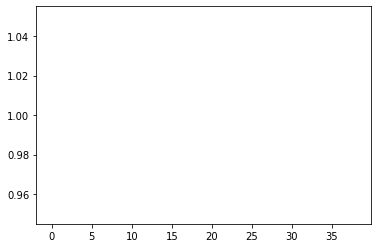

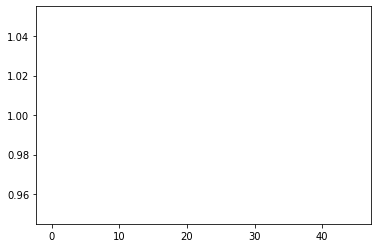

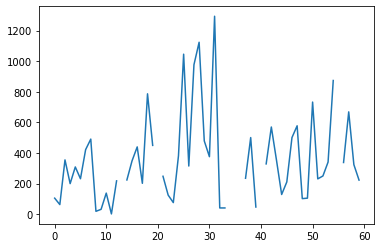

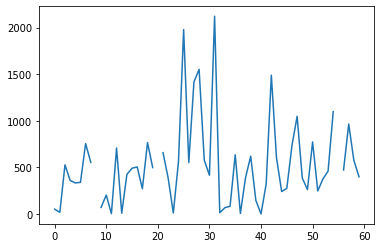

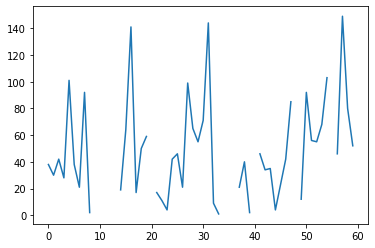

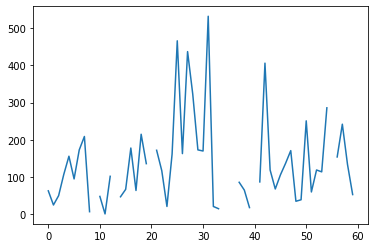

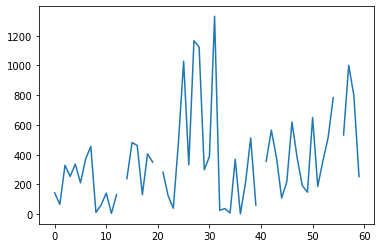

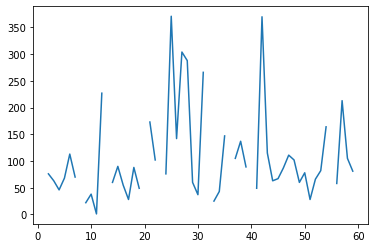

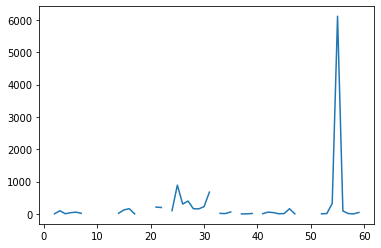

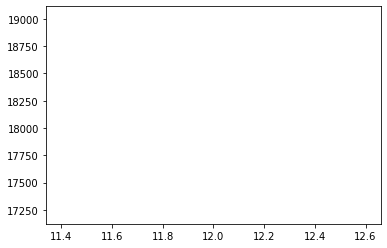

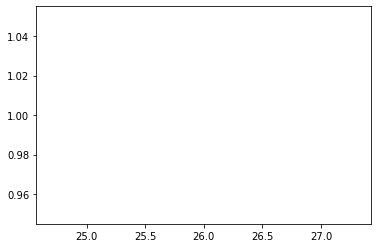

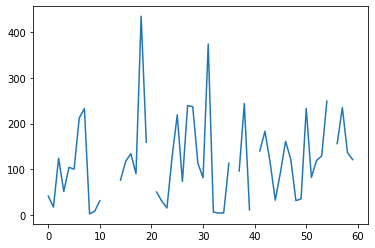

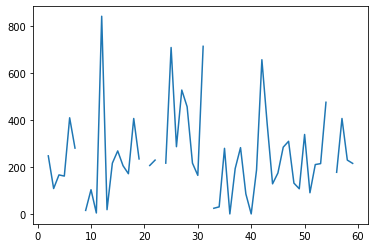

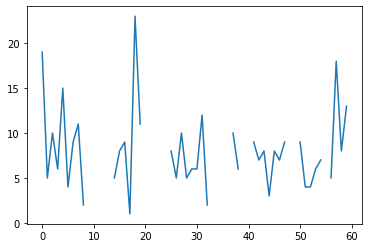

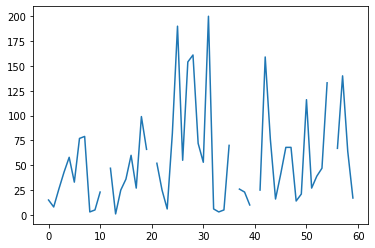

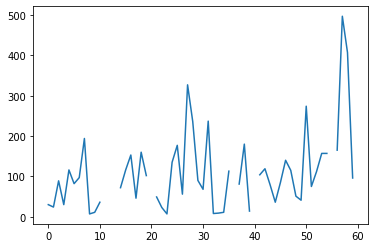

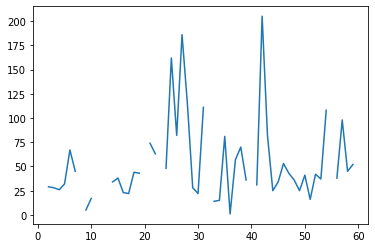

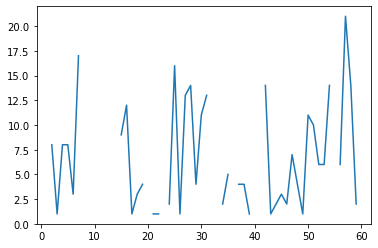

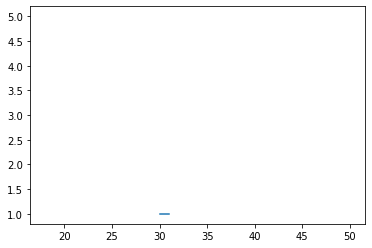

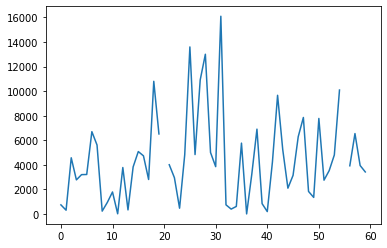

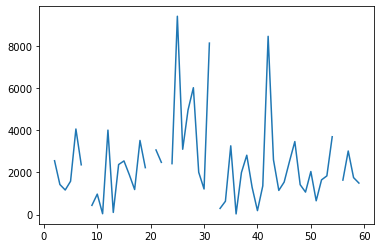

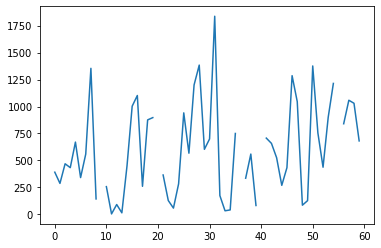

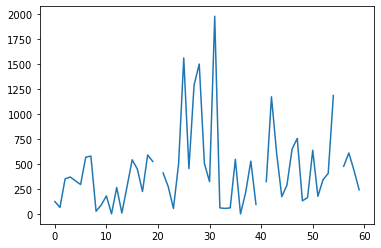

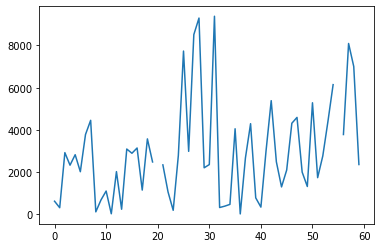

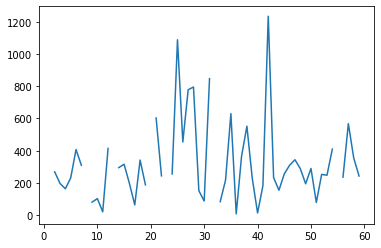

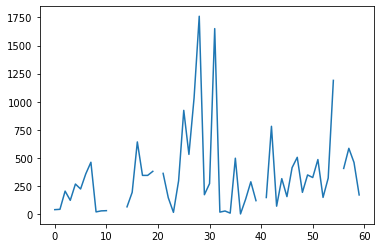

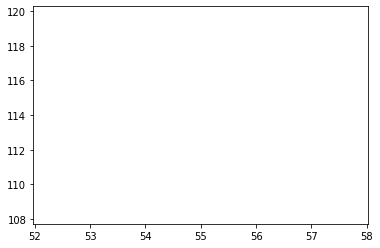

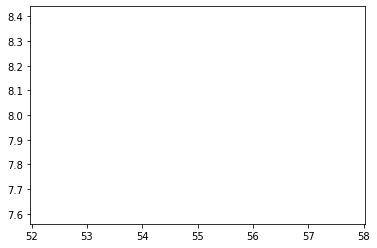

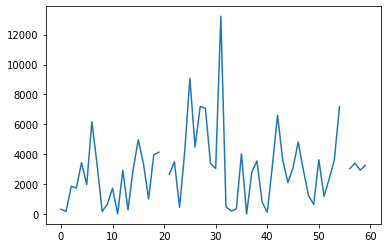

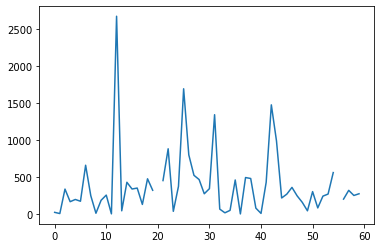

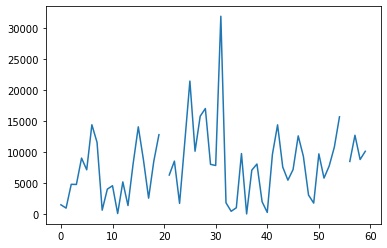

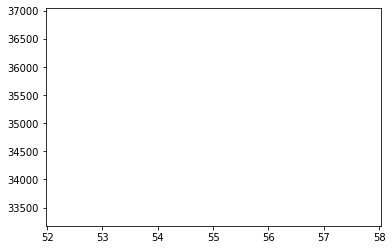

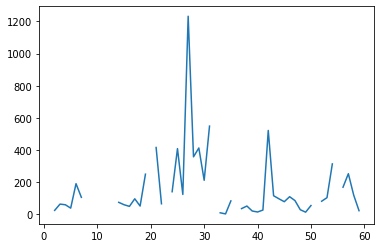

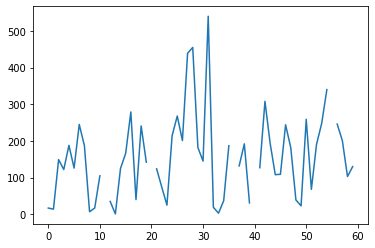

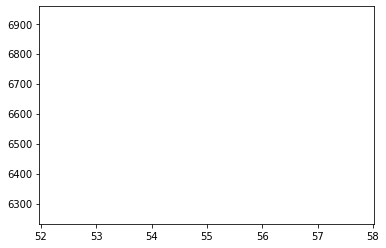

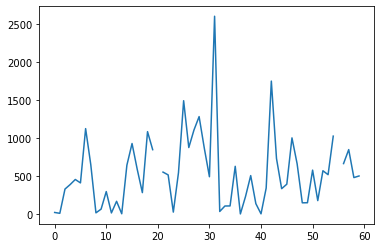

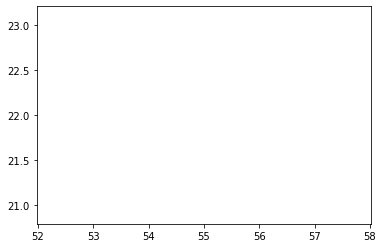

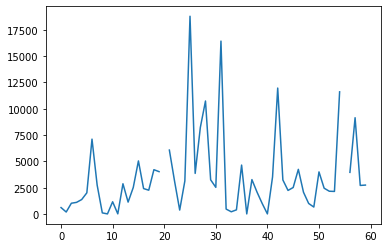

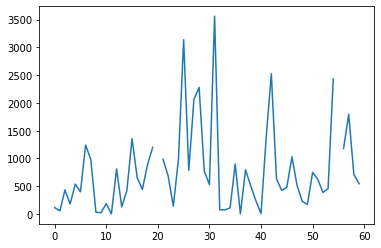

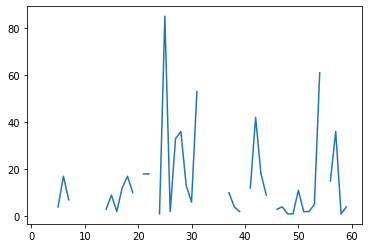

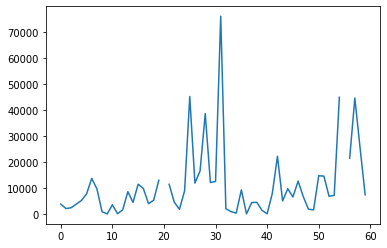

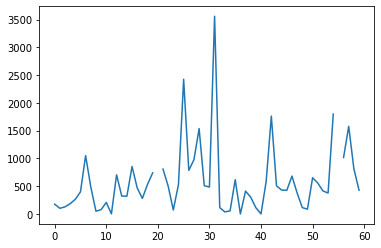

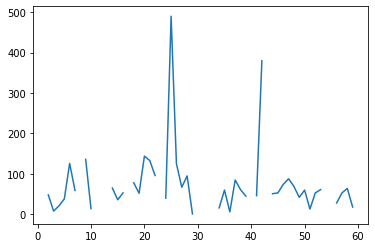

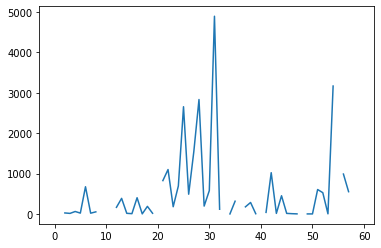

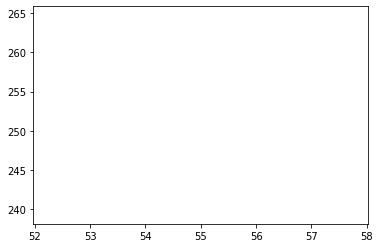

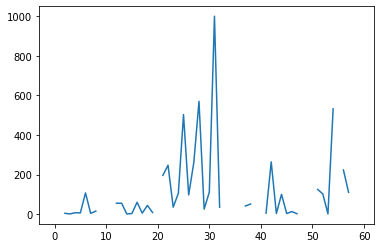

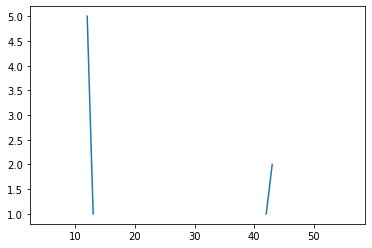

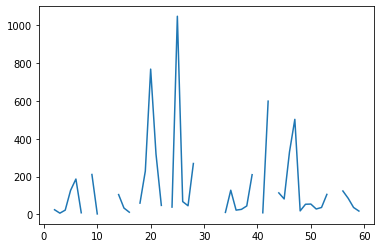

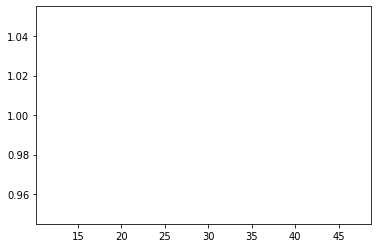

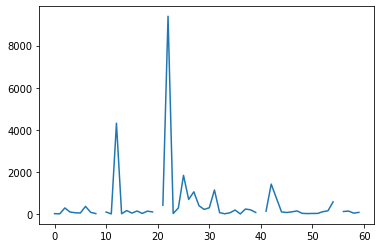

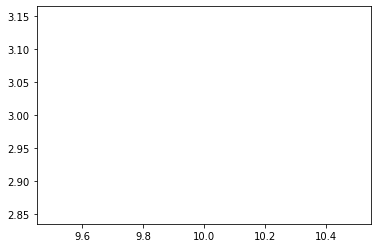

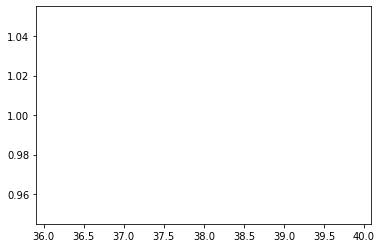

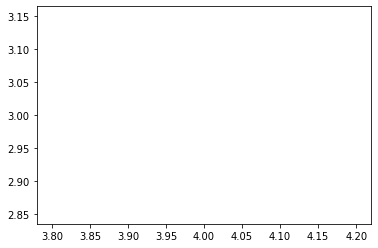

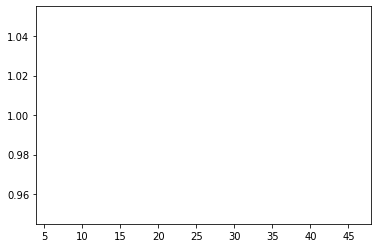

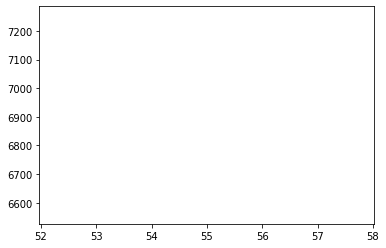

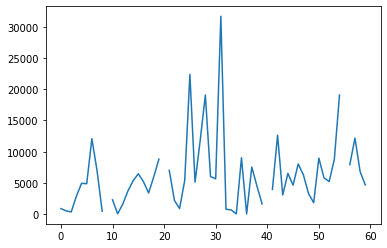

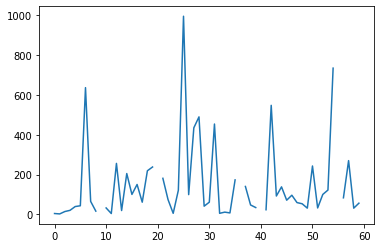

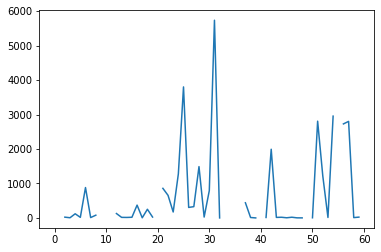

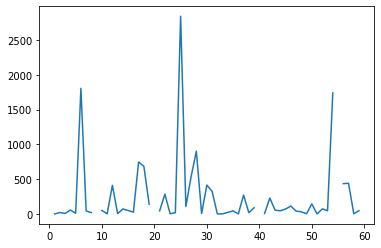

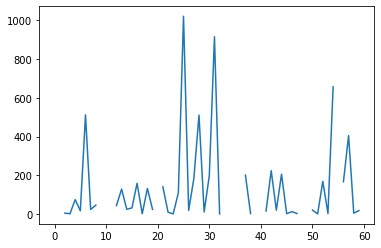

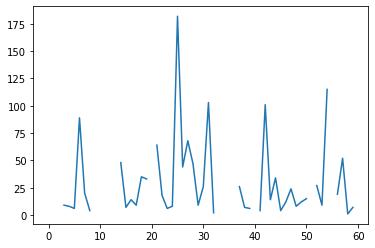

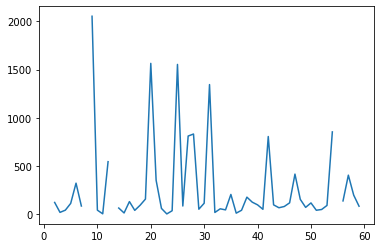

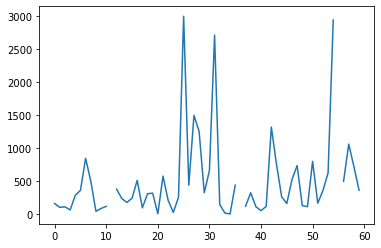

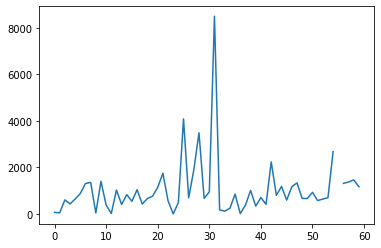

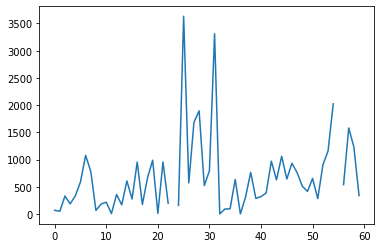

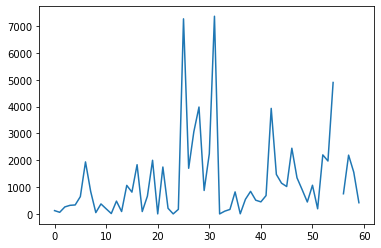

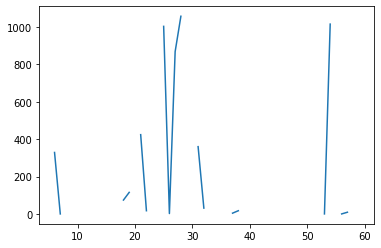

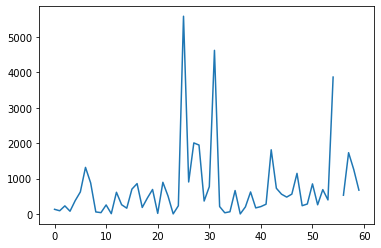

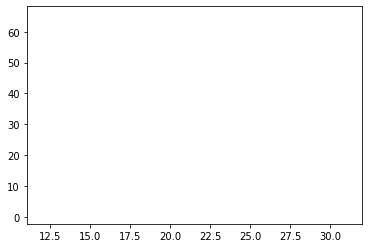

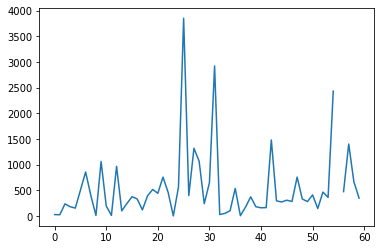

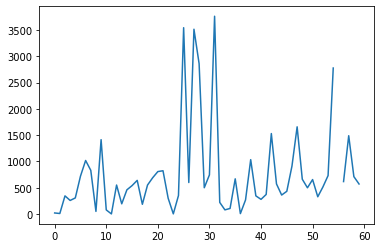

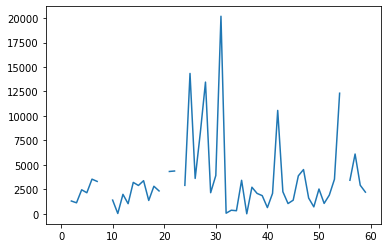

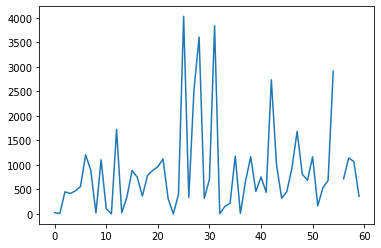

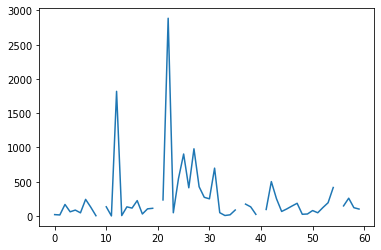

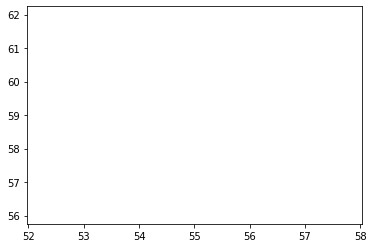

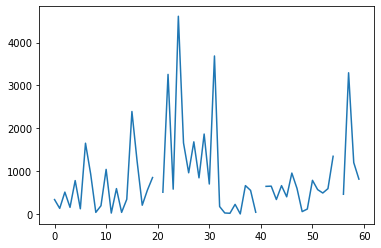

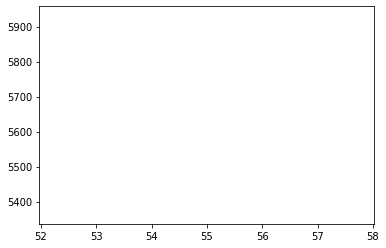

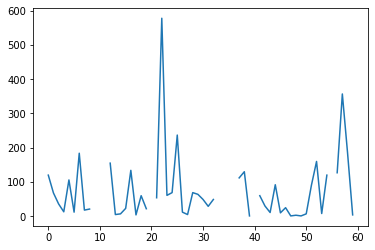

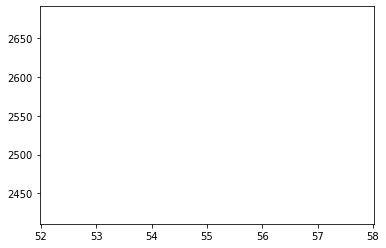

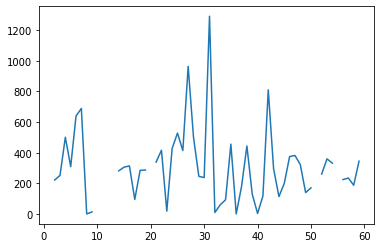

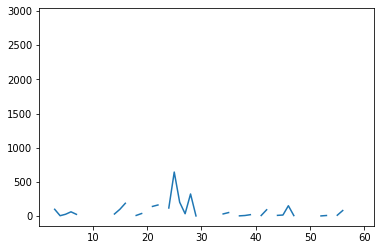

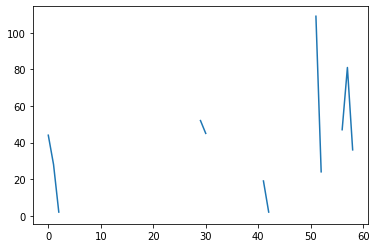

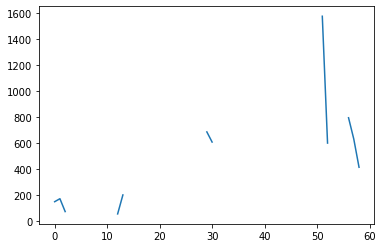

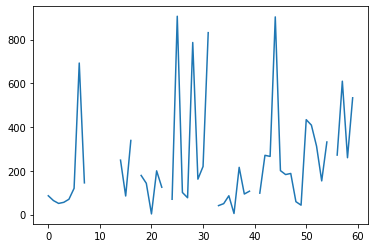

In [53]:
for i in range(84):
    plt.(abc[i])
    plt.show()

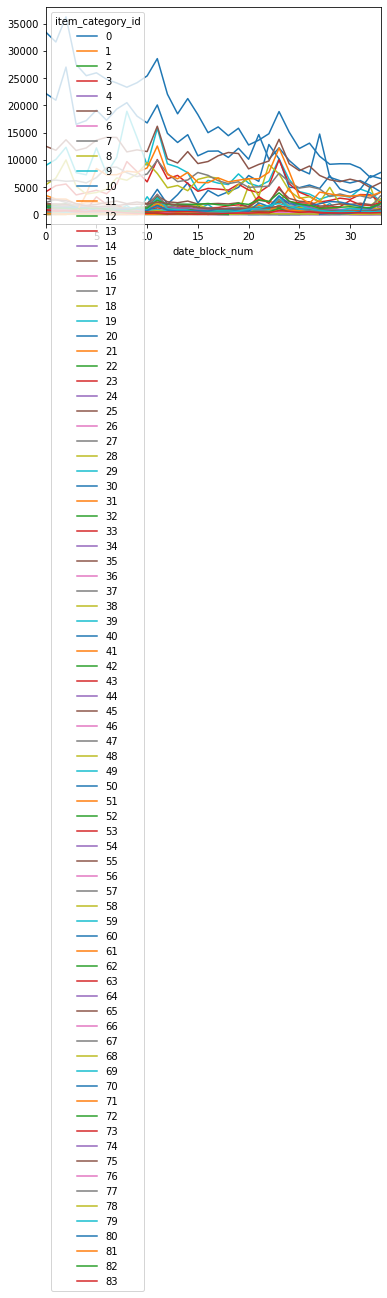

In [55]:
ts.plot()

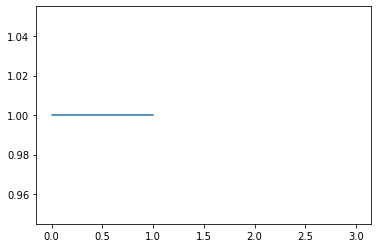

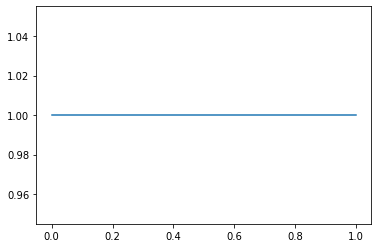

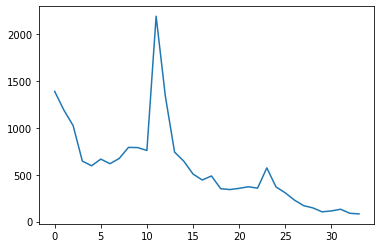

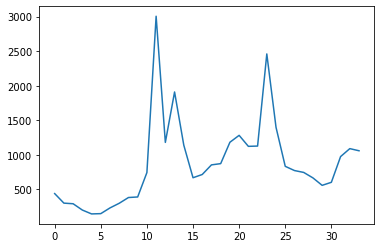

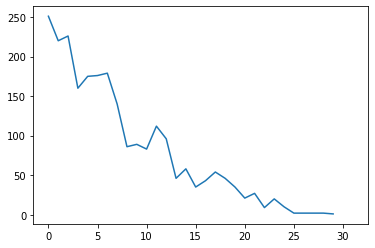

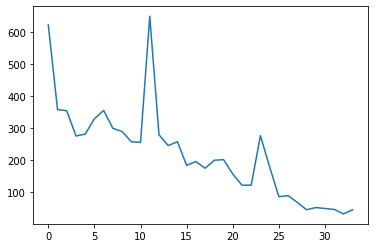

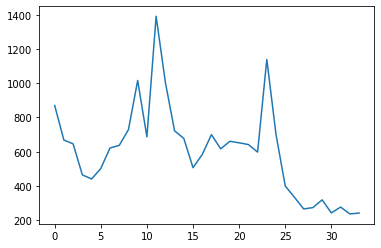

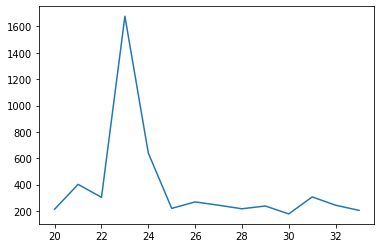

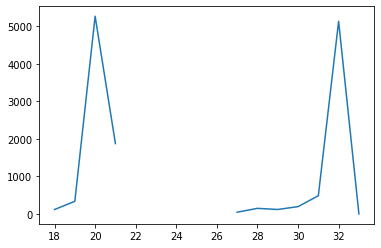

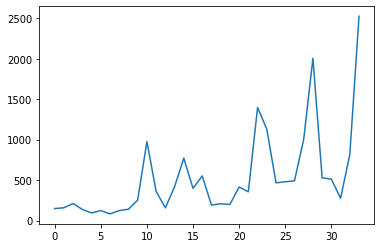

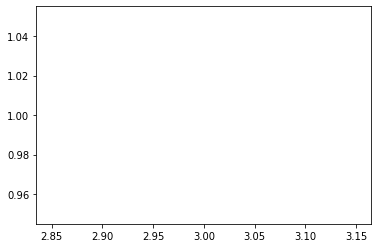

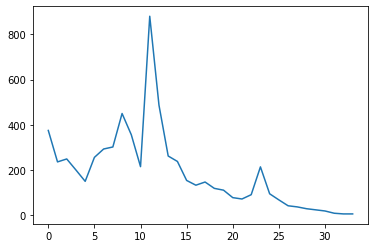

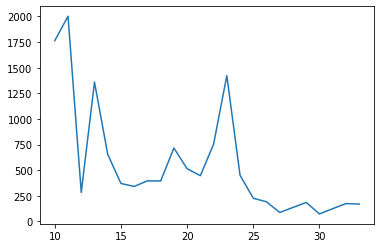

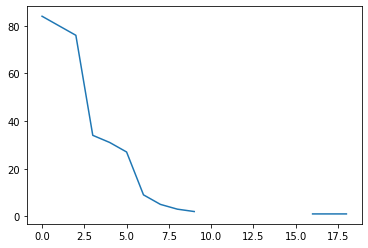

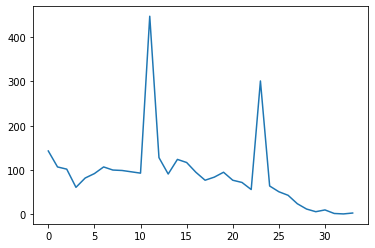

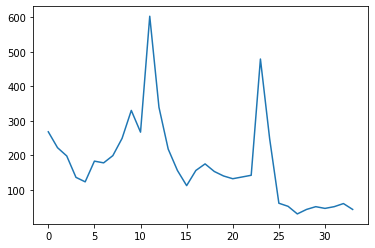

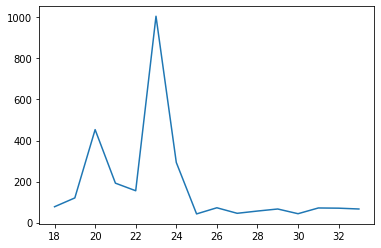

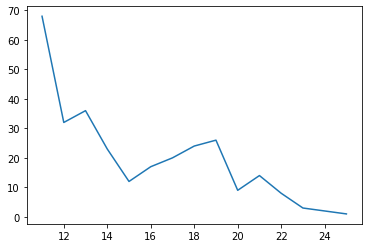

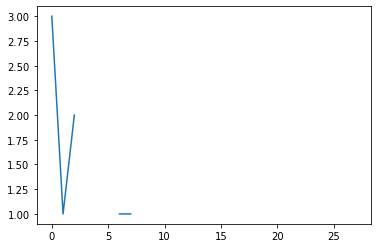

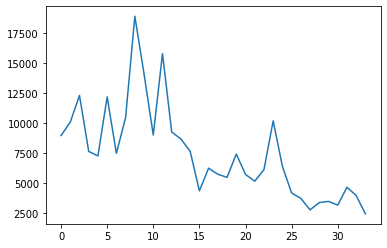

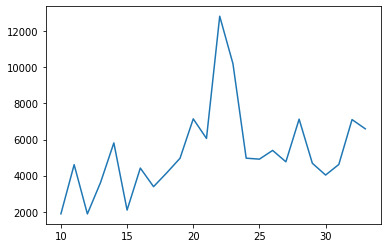

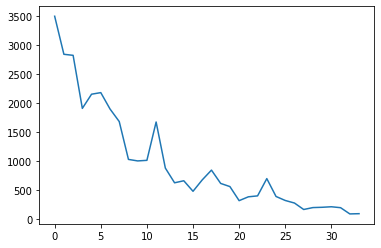

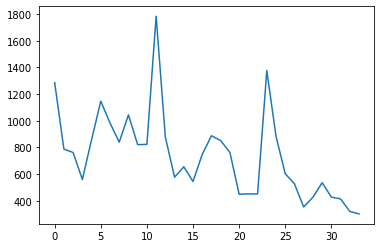

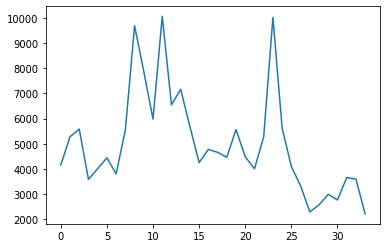

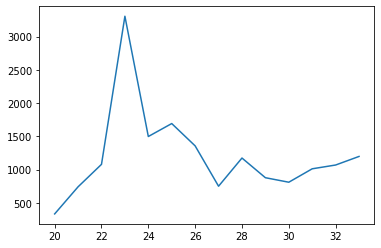

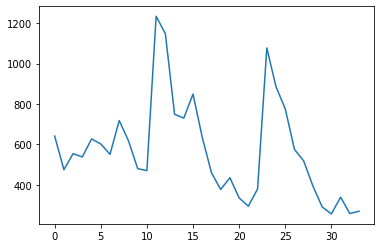

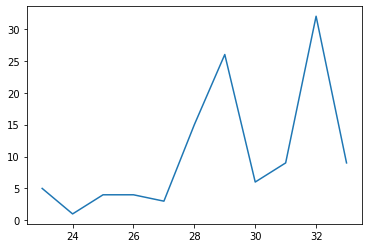

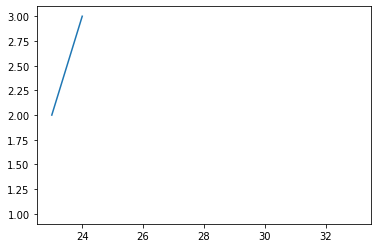

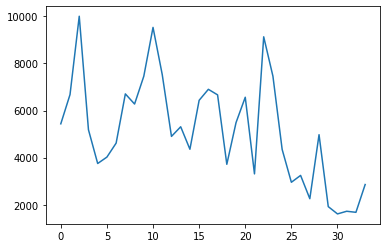

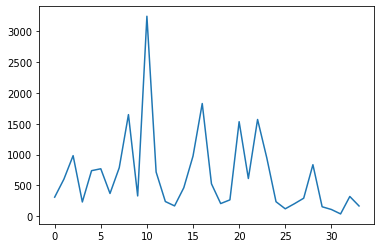

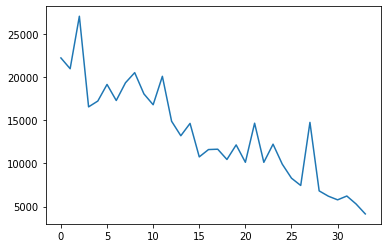

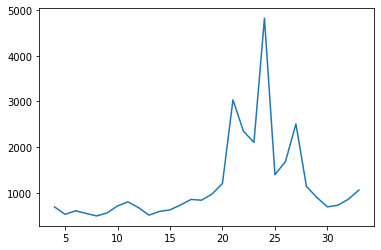

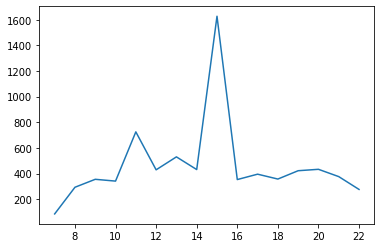

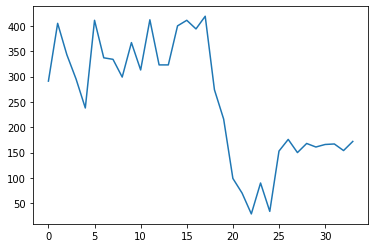

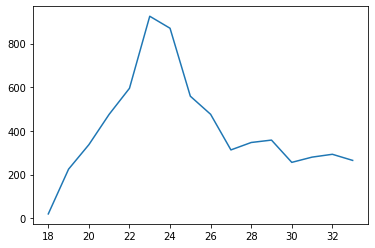

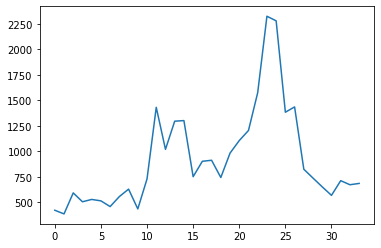

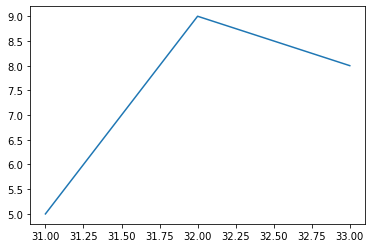

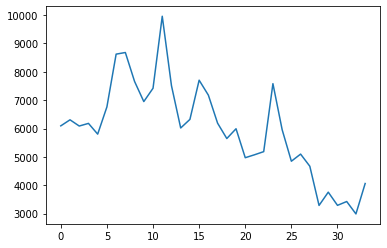

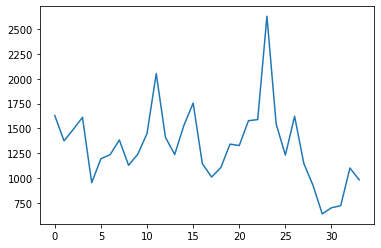

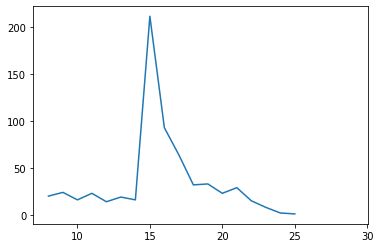

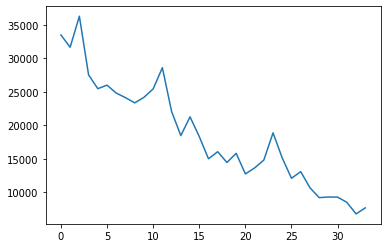

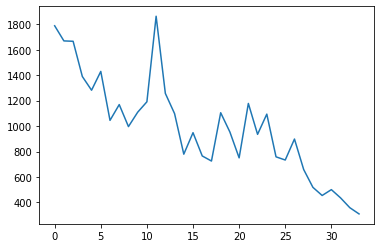

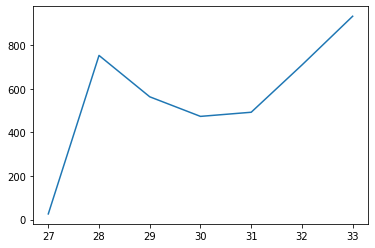

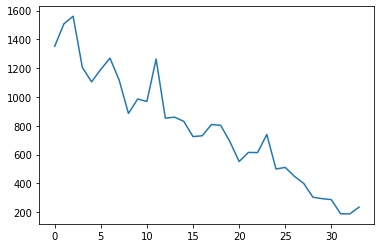

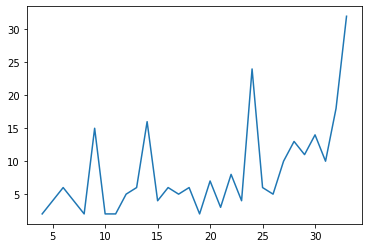

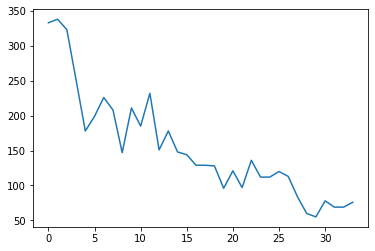

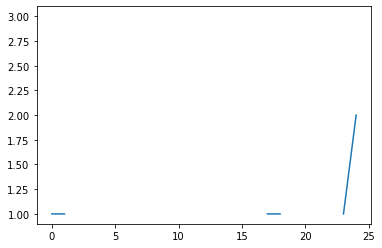

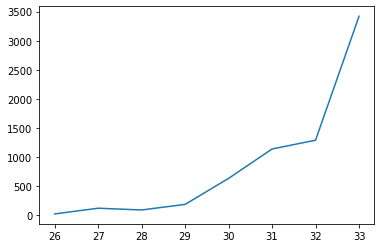

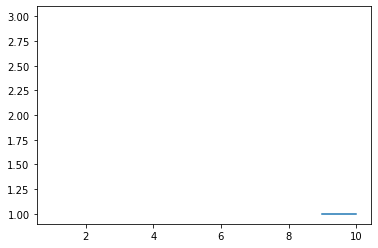

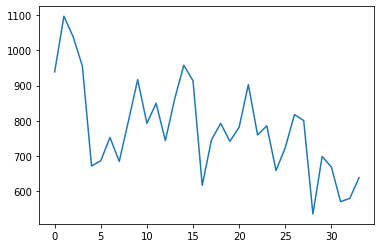

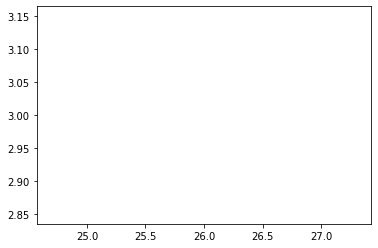

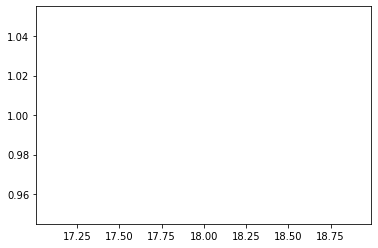

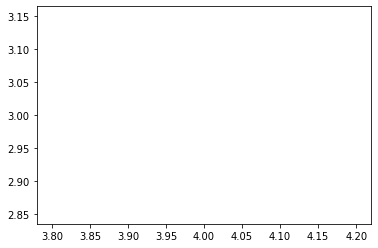

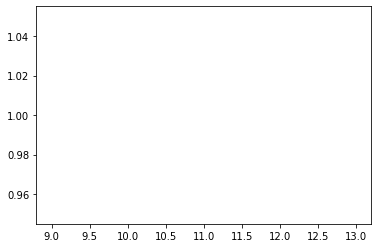

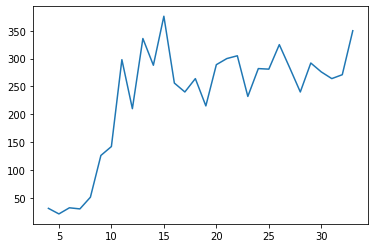

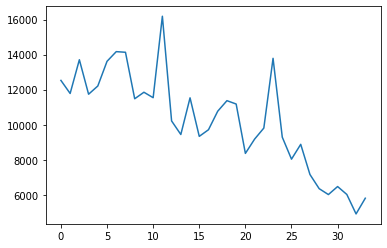

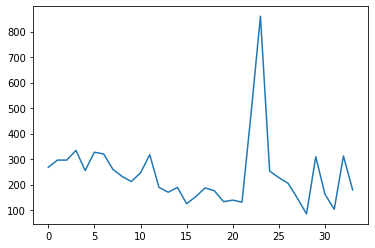

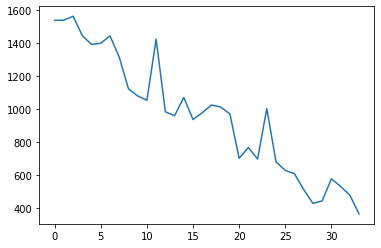

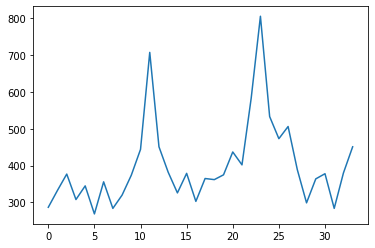

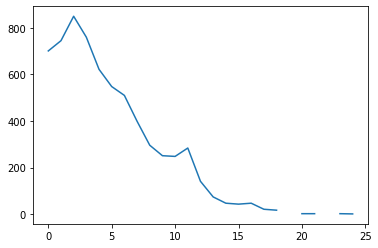

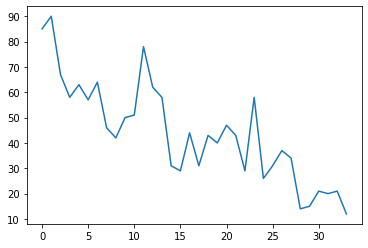

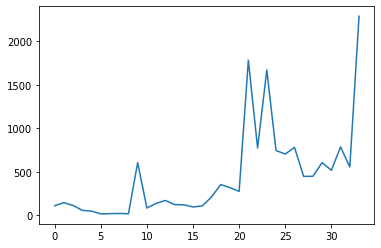

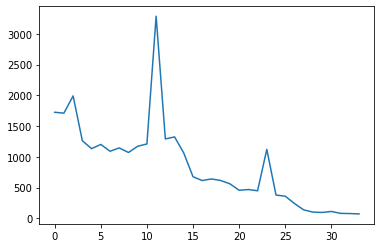

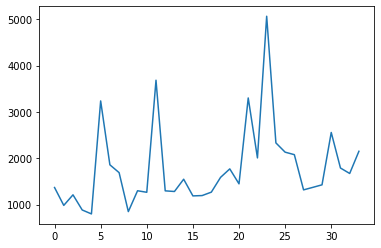

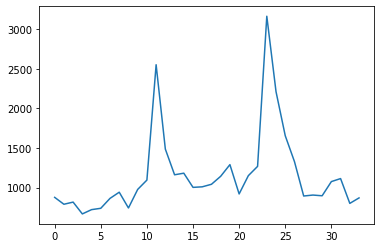

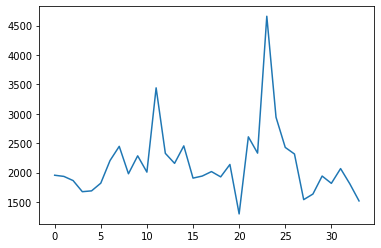

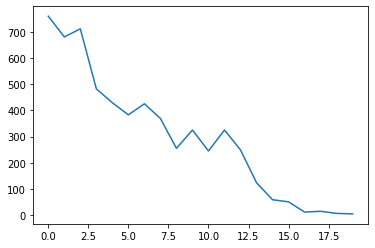

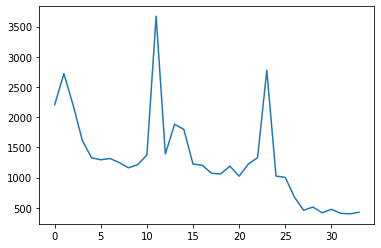

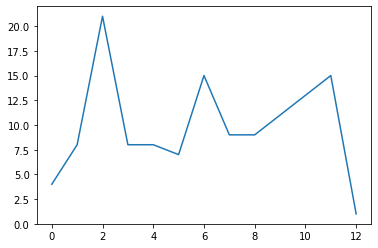

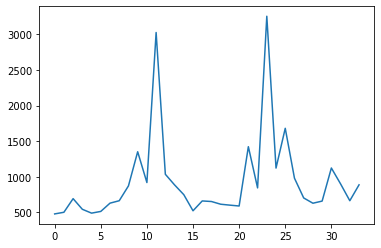

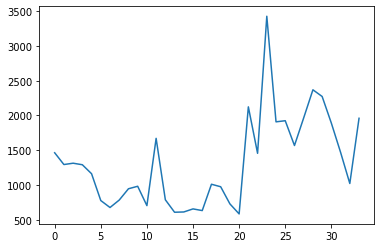

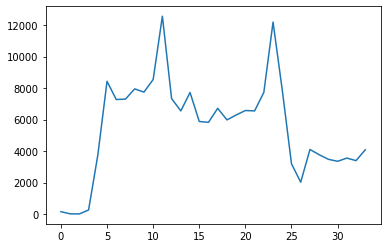

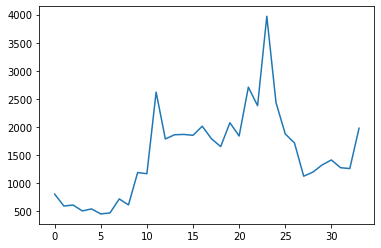

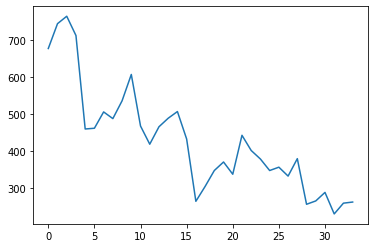

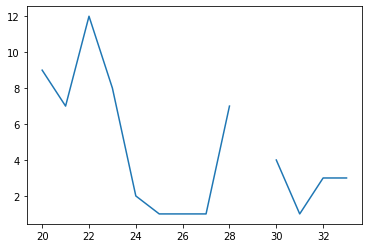

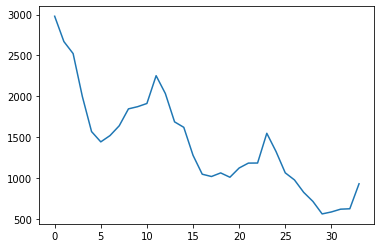

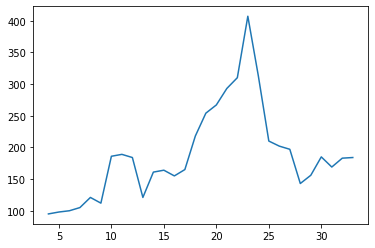

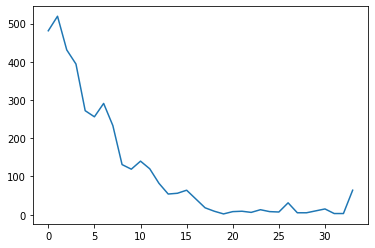

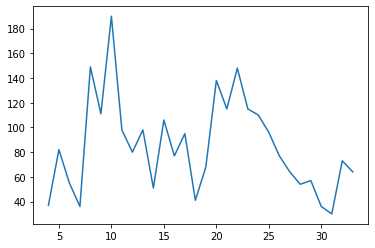

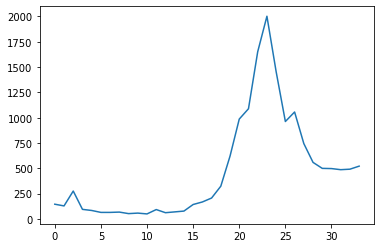

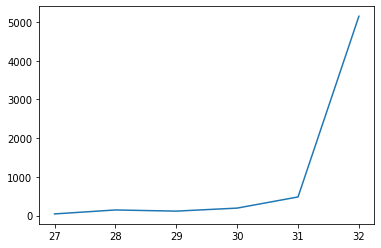

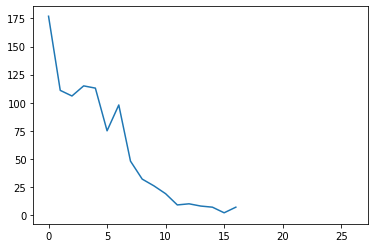

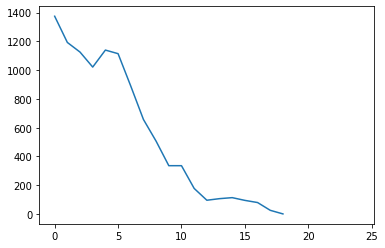

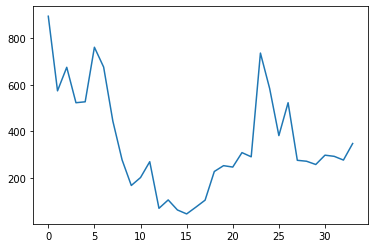

In [60]:
for i in range(84):
    plt.plot(ts[i])
    plt.show()

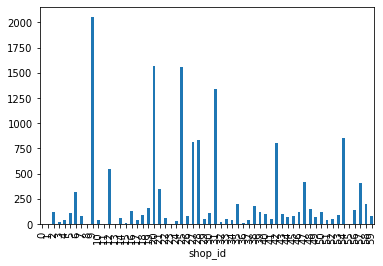

In [73]:
abc[61].T.plot(kind='bar')

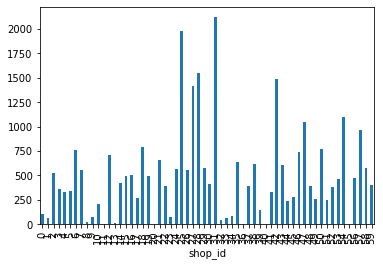

In [86]:
for i in range(4):
    abc[i].T.plot(kind='bar')

In [90]:
ts

item_category_id,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
date_block_num,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1390.0,440.0,251.0,623.0,870.0,NaN,NaN,149.0,...,NaN,2980.0,NaN,481.0,NaN,145.0,NaN,177.0,1374.0,894.0
1,1.0,1.0,1190.0,302.0,220.0,358.0,668.0,NaN,NaN,159.0,...,NaN,2670.0,NaN,519.0,NaN,128.0,NaN,111.0,1192.0,574.0
2,NaN,NaN,1025.0,293.0,226.0,354.0,646.0,NaN,NaN,211.0,...,NaN,2523.0,NaN,431.0,NaN,275.0,NaN,106.0,1125.0,675.0
3,1.0,NaN,646.0,202.0,160.0,275.0,465.0,NaN,NaN,138.0,...,NaN,1998.0,NaN,394.0,NaN,94.0,NaN,115.0,1021.0,523.0
4,NaN,NaN,596.0,146.0,175.0,281.0,441.0,NaN,NaN,95.0,...,NaN,1568.0,95.0,272.0,37.0,83.0,NaN,113.0,1139.0,527.0
5,NaN,NaN,667.0,150.0,176.0,329.0,502.0,NaN,NaN,124.0,...,NaN,1442.0,98.0,256.0,82.0,64.0,NaN,75.0,1114.0,761.0
6,NaN,NaN,618.0,233.0,179.0,355.0,622.0,NaN,NaN,83.0,...,NaN,1519.0,100.0,291.0,55.0,64.0,NaN,98.0,889.0,676.0
7,NaN,NaN,674.0,300.0,140.0,299.0,637.0,NaN,NaN,124.0,...,NaN,1639.0,105.0,233.0,36.0,67.0,NaN,48.0,657.0,444.0
8,NaN,NaN,792.0,383.0,86.0,289.0,729.0,NaN,NaN,141.0,...,NaN,1846.0,121.0,131.0,149.0,52.0,NaN,32.0,506.0,278.0


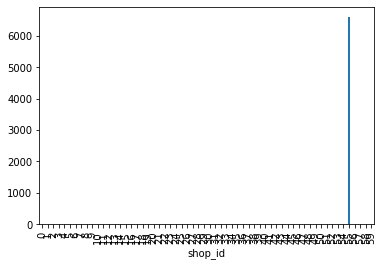

In [92]:
for i in rang
abc[i].plot(kind='bar')